In [2]:
from PIL import Image
import numpy as np
import os
import timeit
from shutil import copyfile
import time
from collections import Counter

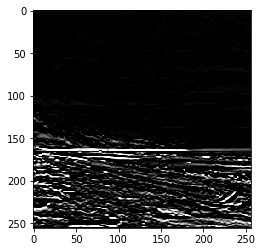

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('small/test/ADE_val_00000113.jpg')

plt.imshow(image)

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

In [68]:
right_sobel = np.array([-1,0,1,
                        -2,0,2,
                        -1,0,1]).reshape(3,3)
left_sobel = np.array([1,0,-1,
                       2,0,-2,
                       1,0,-1]).reshape(3,3)
bottom_sobel = np.array([-1,-2,-1,
                          0,0,0,
                          1,2,1]).reshape(3,3)

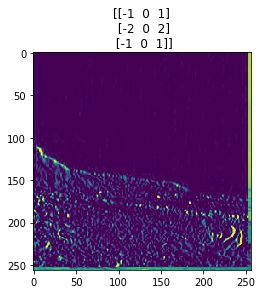

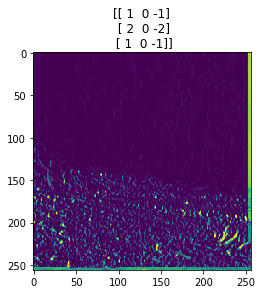

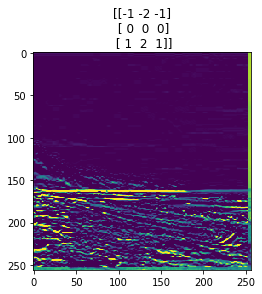

In [145]:
im = Image.open('small/test/ADE_val_00000113.jpg').convert('L')
grid = np.array(im)
output_grid = grid.copy()

final_grids = []

for mask in [right_sobel, left_sobel,bottom_sobel]:
    kernel = mask

    for r in range(253):
        for c in range(253):
            face = np.array([grid[r][c],grid[r][c+1],grid[r][c+2],
                             grid[r+1][c],grid[r+1][c+1],grid[r+1][c+2],
                             grid[r+2][c],grid[r+2][c+1],grid[r+2][c+2]]).reshape(3,3)
            new_val = int(np.sum(face*kernel))
            if new_val<=0:
                new_val = 0
            elif new_val>=255:
                new_val = 255
            output_grid[r][c] = new_val
    final_grids.append(output_grid)
    plt.title(mask)
    plt.imshow(Image.fromarray(output_grid))
    plt.show()

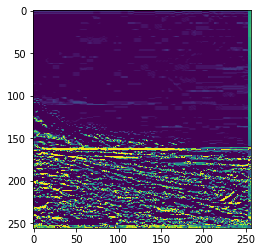

In [146]:
plt.imshow((final_grids[0]+final_grids[1]+final_grids[2])/3)

In [ ]:
next